In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from os.path import join, exists, basename
import numpy as np
from math import isnan, ceil
import statsmodels.api as sm

# *Arabdopsis thaliana*

Read in the results from the ArabidopsisPPI hyperparameter search and compile into paper figures (TODO-check figure numbers when paper is final).

In [3]:
max_i = 1000
results_folder = 'data/0003_results_of_ppi_prediction_parameter_search/Arabidopsis_thaliana'
df_list = []
for k in range(4,8):
    for i in range(max_i):
        fname = join(results_folder, f'AtGrand_{k}mers_{i}.csv')
        if exists(fname):
            res_df = pd.read_csv(fname)
            res_df['k']=k
            df_list.append(res_df)
results_df = pd.concat(df_list, ignore_index=True)
mean_results_df = results_df.groupby(['seed_i','k'], as_index=False).mean()


Compare validation results for different values of *k*

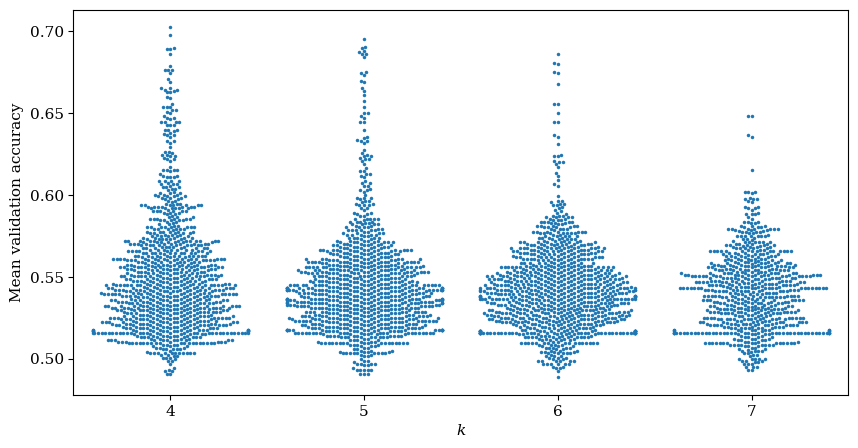

In [47]:
plt.figure(figsize=(10,5))
plt.rcParams['font.family']=['serif']
plt.rcParams['font.size']=11
sb.swarmplot(x=mean_results_df['k'], y=mean_results_df['max_val_acc'],size=2.5)
plt.xlabel('k',style='italic')
plt.ylabel('Mean validation accuracy')
plt.show()

Within the results for 4-mers, look at the validation accuracies achieved by parameter sets that use different amounts of blocks of convolutional layers. When the number of blocks is zero, the data is immediately flattened and passed through to the dense classification layers.

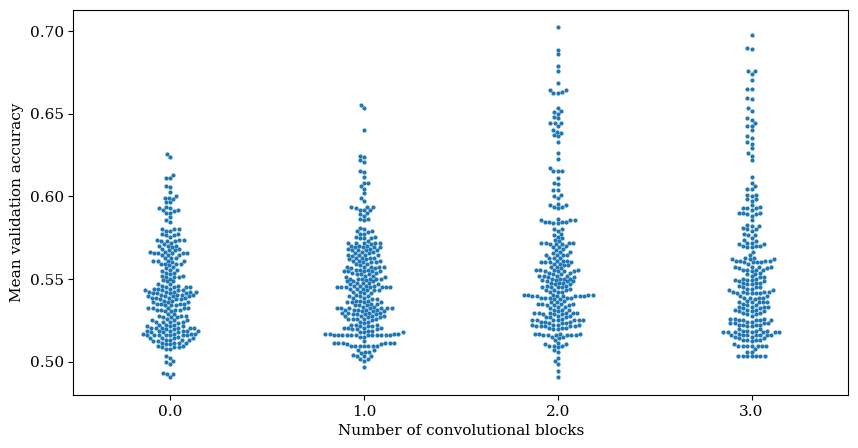

In [48]:
plt.figure(figsize=(10,5))
plt.rcParams['font.family']=['serif']
plt.rcParams['font.size']=11
res_4 =mean_results_df.query('k==4') 
sb.swarmplot(x=res_4['num_conv_blocks'], y=res_4['max_val_acc'],size=3)
plt.ylabel('Mean validation accuracy')
plt.xlabel('Number of convolutional blocks')
plt.show()

In [15]:
mean_results_df.sort_values('val_acc').iloc[-10:]

,seed_i,k,Unnamed: 0,pre_activation,start_num_filters,num_filter_pattern,filter_width,num_conv_layers,num_conv_blocks,conv_dropout,...,epoch,max_val_acc,loss,acc,recall,precision,val_loss,val_acc,val_recall,val_precision
3077,827,4,2.0,1.0,64.0,2.0,9.0,3.0,1.0,0.4,...,28.6,0.653394,0.252835,0.999095,0.998176,1.000000,1.208016,0.625339,0.673684,0.629179
3280,881,5,2.0,0.0,256.0,0.0,5.0,3.0,2.0,0.4,...,433.2,0.690498,2.941032,0.999698,1.000000,0.999394,3.763602,0.626244,0.633333,0.639796
2588,692,6,2.0,0.0,128.0,2.0,7.0,3.0,2.0,0.0,...,256.6,0.675113,0.858645,0.996682,0.997568,0.995769,1.322983,0.627149,0.614035,0.644088
827,212,5,2.0,0.0,64.0,2.0,11.0,3.0,2.0,0.1,...,486.0,0.686878,1.298577,0.921569,0.947112,0.908682,1.909534,0.628959,0.643860,0.644451
3279,881,4,2.0,0.0,256.0,0.0,5.0,3.0,2.0,0.4,...,495.4,0.702262,3.643437,0.981900,0.982979,0.980820,4.611104,0.629864,0.622807,0.646300
3237,869,5,2.0,0.0,256.0,1.0,11.0,1.0,3.0,0.5,...,297.0,0.685973,1.525632,0.981599,0.982371,0.980593,2.744922,0.630769,0.668421,0.637549
1561,412,5,2.0,0.0,32.0,1.0,7.0,3.0,2.0,0.1,...,146.4,0.685973,1.109351,0.955656,0.958663,0.952679,1.939832,0.632579,0.791228,0.631274
1628,430,6,0.0,1.0,256.0,0.0,5.0,2.0,3.0,0.3,...,499.0,0.674208,17.264385,0.995475,1.000000,0.990964,18.089319,0.633484,0.868421,0.600000
1023,267,4,2.0,1.0,32.0,0.0,9.0,2.0,2.0,0.2,...,30.8,0.653394,0.090515,0.991252,0.992097,0.990385,0.959864,0.638009,0.635088,0.654632
2082,553,5,2.0,0.0,64.0,2.0,11.0,3.0,2.0,0.6,...,412.8,0.687783,1.404292,0.993363,0.993313,0.993313,2.147095,0.640724,0.710526,0.636554


[5, 5, 4, 4, 5, 4, 5, 5, 4, 4]